### 1. Data Cleaning

In [11]:
library(ggplot2)
library(tidyr)
library(corrplot)
library(psych)

In [14]:
case_data <- "/kaggle/input/google-trends-data/report.csv"
open_file  <- file(case_data, open = "r")

linecount <- 0
string_data <- ""
while (length(single_line <- readLines(open_file, n = 1, warn = FALSE)) > 0) {
  linecount <- linecount + 1
  
  if (linecount < 3) {
    case_data <- paste0(case_data,single_line)     
  }
  
  if (linecount == 5) column_headings = strsplit(single_line, ",")[[1]]
  
  if (linecount > 5) {

    if (gsub(pattern=",", x=single_line, replacement="") == "") break
    
    string_data <- paste0(string_data,single_line,"\n")
  }
}
close(open_file)

case_table <- read.table(textConnection(string_data), sep=",", header=FALSE, stringsAsFactors = FALSE)

names(case_table) <- column_headings

In [15]:
head(case_table)

,Week,data science,data scientist,analytics,google analytics,machine learning
,<chr>,<int>,<int>,<int>,<int>,<int>
1,2004-01-04 - 2004-01-10,2,0,5,0,3
2,2004-01-11 - 2004-01-17,2,0,6,0,3
3,2004-01-18 - 2004-01-24,2,0,6,0,4
4,2004-01-25 - 2004-01-31,3,0,7,0,4
5,2004-02-01 - 2004-02-07,2,0,8,0,4
6,2004-02-08 - 2004-02-14,1,0,6,0,4


In [25]:
column_headings

[1] "Week"             "data science"     "data scientist"   "analytics"       
[5] "google analytics" "machine learning"

In [24]:
# Change the Week Column name into ID
case_table$WeekID <- seq.int(nrow(case_table))
head(case_table)

,Week,data science,data scientist,analytics,google analytics,machine learning,WeekID
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,2004-01-04 - 2004-01-10,2,0,5,0,3,1
2,2004-01-11 - 2004-01-17,2,0,6,0,3,2
3,2004-01-18 - 2004-01-24,2,0,6,0,4,3
4,2004-01-25 - 2004-01-31,3,0,7,0,4,4
5,2004-02-01 - 2004-02-07,2,0,8,0,4,5
6,2004-02-08 - 2004-02-14,1,0,6,0,4,6


### 2. Exploratory Data Analysis

In [6]:
tail(case_table,n=10L)

,Week,data science,data scientist,analytics,google analytics,machine learning,WeekID
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
639,2016-03-27 - 2016-04-02,5,2,68,37,7,639
640,2016-04-03 - 2016-04-09,5,2,71,39,8,640
641,2016-04-10 - 2016-04-16,5,2,71,39,8,641
642,2016-04-17 - 2016-04-23,5,2,71,39,8,642
643,2016-04-24 - 2016-04-30,5,2,70,38,8,643
644,2016-05-01 - 2016-05-07,5,2,67,37,7,644
645,2016-05-08 - 2016-05-14,6,4,71,38,7,645
646,2016-05-15 - 2016-05-21,5,3,69,38,8,646
647,2016-05-22 - 2016-05-28,5,2,70,38,8,647


In [7]:
colnames(case_table)

[1] "Week"             "data science"     "data scientist"   "analytics"       
[5] "google analytics" "machine learning" "WeekID"

In [57]:
# Summary Statistics

# seperate the two distributions
term_analytics <- c(case_table$analytics)
term_datascience <- c(case_table$`data science`)
term_googleanalytics <- c(case_table$`google analytics`)

In [59]:
# get the statistical summaries - data science
describe(term_datascience)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,648,1.625,1.073695,1,1.376923,0,0,6,6,1.863008,2.81089,0.04217872


In [58]:
# get the statistical summaries - analytics
describe(term_analytics)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,648,58.25772,30.33568,71,60.55962,25.2042,4,100,96,-0.6328899,-1.1068,1.191698


* The search behaviour of the **analytics** and **data science** terms are very different

In [62]:
# get the statistical summaries - google analytics
describe(term_googleanalytics)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,648,30.90586,17.25288,39,32.51154,11.8608,0,51,51,-0.7460854,-0.9625066,0.6777572


* The search behavior of the two terms: **analytics** and **google analytics** are very similar.

In [29]:
case_table_longer <- case_table %>%
pivot_longer(
    cols = c( `data science`, `data scientist`, `google analytics`, `machine learning`), 
               names_to = "search_term", 
               values_to = "search_value"
)

head(case_table_longer,n=10L)

Week,analytics,WeekID,search_term,search_value
<chr>,<int>,<int>,<chr>,<int>
2004-01-04 - 2004-01-10,5,1,data science,2
2004-01-04 - 2004-01-10,5,1,data scientist,0
2004-01-04 - 2004-01-10,5,1,google analytics,0
2004-01-04 - 2004-01-10,5,1,machine learning,3
2004-01-11 - 2004-01-17,6,2,data science,2
2004-01-11 - 2004-01-17,6,2,data scientist,0
2004-01-11 - 2004-01-17,6,2,google analytics,0
2004-01-11 - 2004-01-17,6,2,machine learning,3
2004-01-18 - 2004-01-24,6,3,data science,2


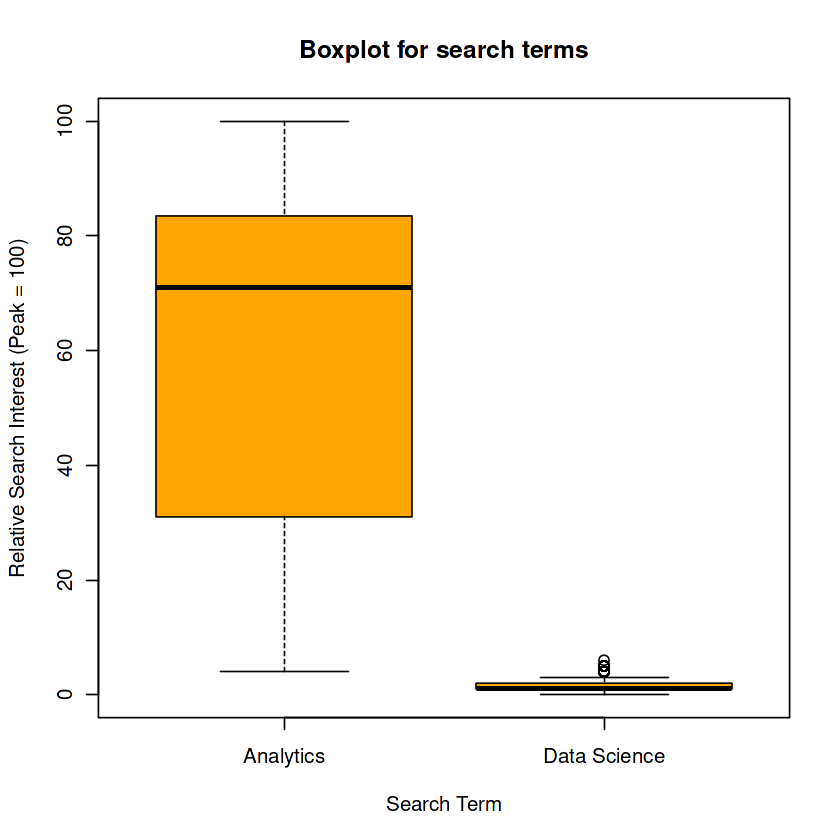

In [63]:
# We need to learn more about the individual distribution
par(mfrow = c(1,1))
boxplot(term_analytics, term_datascience,
       names = c("Analytics", "Data Science"),
        xlab = "Search Term",
        ylab = "Relative Search Interest (Peak = 100)",
        main = "Boxplot for search terms",
        col = "orange"
       )

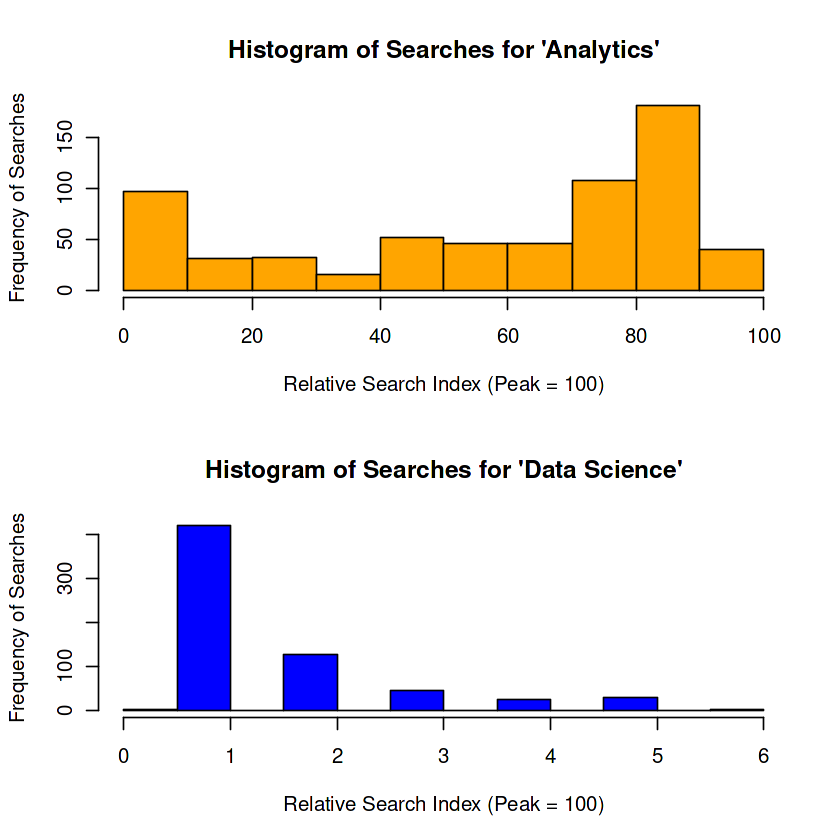

In [64]:
par(mfrow = c(2,1))
hist(term_analytics,
    main = "Histogram of Searches for 'Analytics'",
    ylab = "Frequency of Searches",
    xlab = "Relative Search Index (Peak = 100)",
    col = "orange")
hist(term_datascience,
    main = "Histogram of Searches for 'Data Science'",
    ylab = "Frequency of Searches",
    xlab = "Relative Search Index (Peak = 100)",
    col = "blue")

Histogram of Searches for **Data Science** is between 1 and 100.

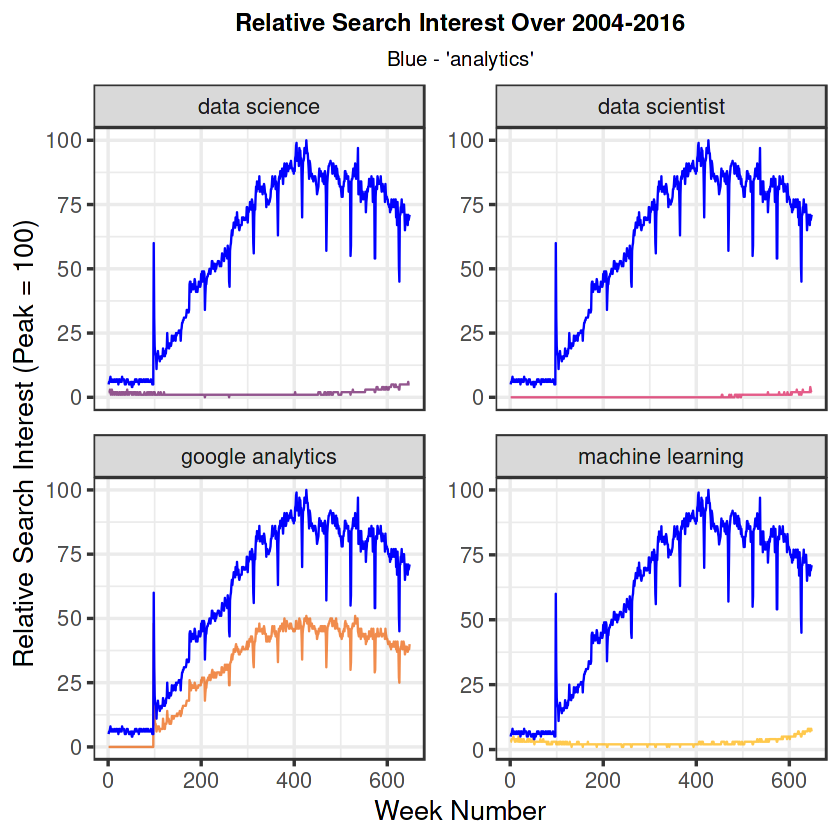

In [65]:
# Plot relative search interest over weeks

my_color_pallete <- c("#640D5F", "#D91656", "#EB5B00", "#FFB200")

ggplot(
    data=case_table_longer,
    aes(x=WeekID, y= search_value, group=search_term, color = search_term)) +

geom_line(alpha=0.7)+
geom_line(data=case_table, aes(x=WeekID, y=analytics, group=1), color="blue")+
facet_wrap(~search_term,scales="free_y")+
labs(
    title="Relative Search Interest Over 2004-2016",
    subtitle= "Blue - 'analytics'",
    x = "Week Number",
    y = "Relative Search Interest (Peak = 100)"
)+
scale_color_manual(
    values = my_color_pallete
)+
theme_bw(base_size=16)+
theme(
    plot.title = element_text(hjust=0.5,face="bold",size=14),
    plot.subtitle = element_text(hjust=0.5,size=12),
    panel.spacing = unit(1, "lines"),
    legend.position="none"
)

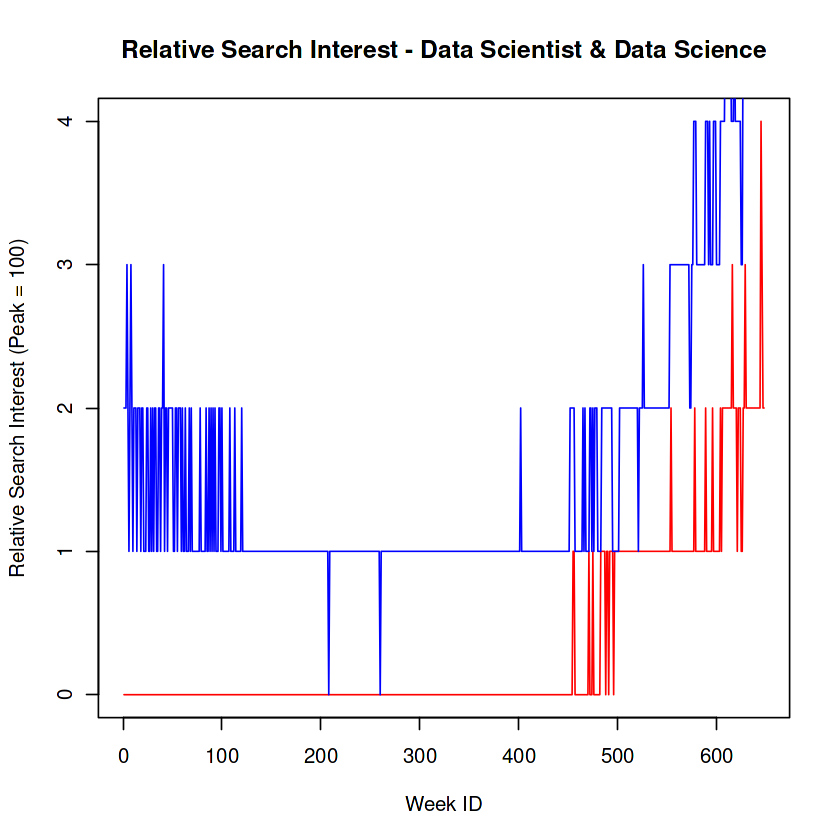

In [66]:
# Seems like 'data scientist' is too narrow. It has very few searches
# The same applies to the search terms 'data science' as well
# Is there a difference between the 'data science' and 'data scientist'?

par(mfrow = c(1,1))
plot(case_table$WeekID, case_table$`data scientist`,
    main = "Relative Search Interest - Data Scientist & Data Science",
     ylab = "Relative Search Interest (Peak = 100)",
     xlab = "Week ID",
     type = 'l',
     col = 'red'
    )
lines(case_table$WeekID,case_table$`data science`, type='l', col='blue')

1. The search interest in "analytics" is significantly higher than that all versions of "data science," making the latter less prominent or noticeable in comparison.
2. The relative search interest only goes upto 4 out of a maximum value of 100 for both 'data scientist' and 'data science' search terms.

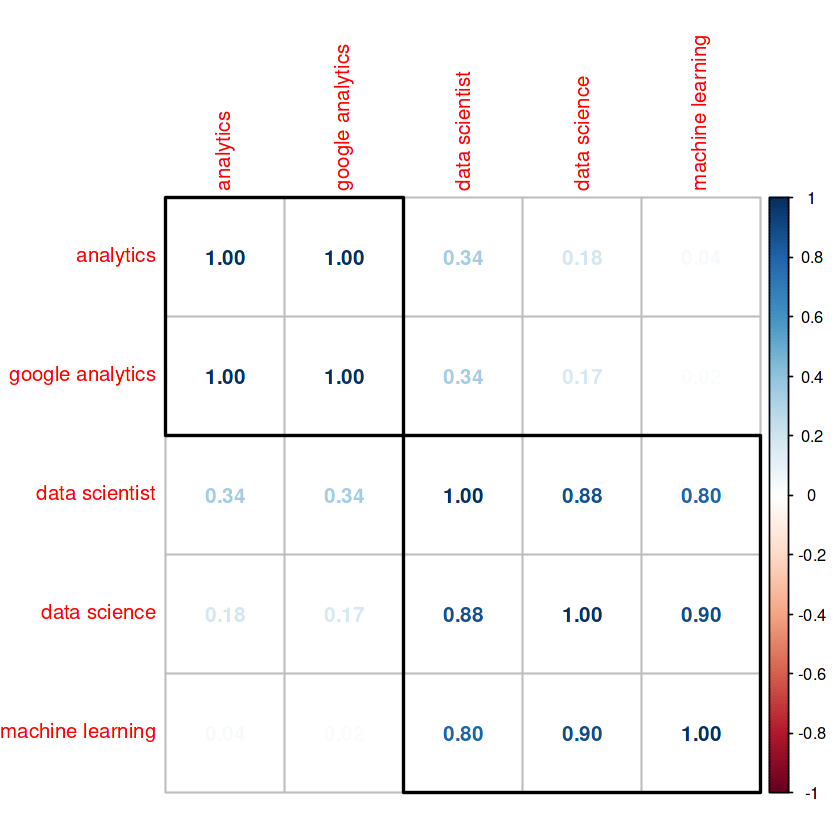

In [67]:
# Correlation analysis

# Subset the search terms
search_terms <- case_table[,c(2,3,4,5,6)]

# Calculate the correlation matrix
correlation_matrix <- cor(search_terms)

# Visualize the correlation matrix
corrplot(correlation_matrix, method = 'number', order='hclust', addrect=2)

1. People searching for "**data science**" often look up "**data scientist**," too (they’re 88% correlated). If we use both terms in our content, we’ll probably reach the same audience.

2. "**analytics**" and "**machine learning**" don’t really overlap in searches. People look for these topics separately, so we should keep our strategies for them distinct.

3. "**data science**" and "**machine learning**" are almost always searched together (90% correlated). If we talk about one, the other’s audience will likely care, too. Covering both in our content works great!

4. The correlation of the search interest between '**data science**' and '**analytics**' is only 18%. This suggest that these two searches are not happening in a similar way. These maybe different people searching or people searching for different content.

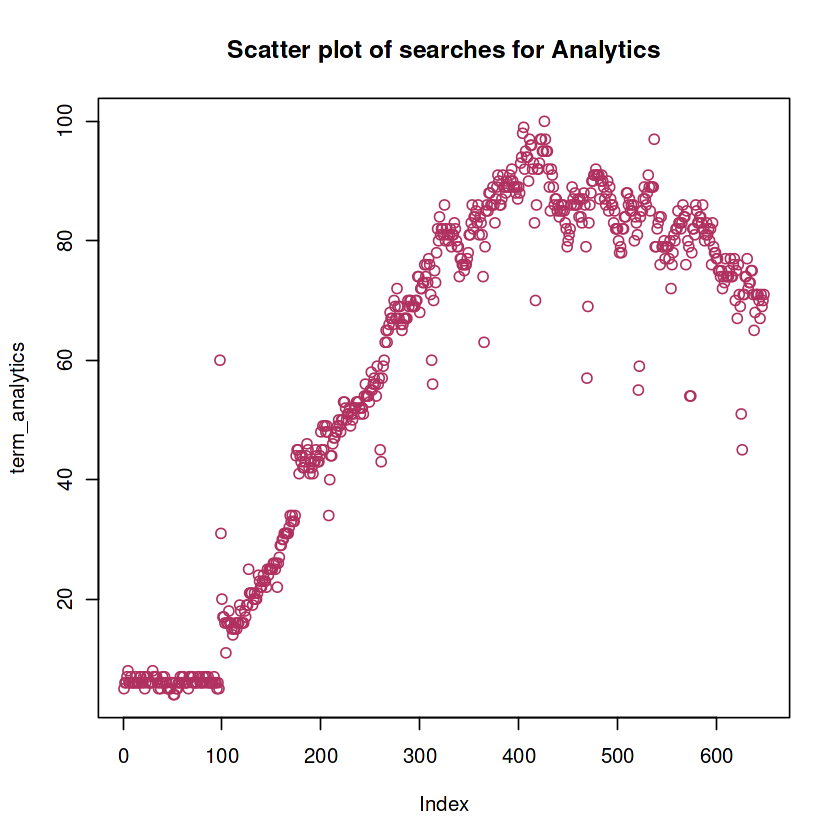

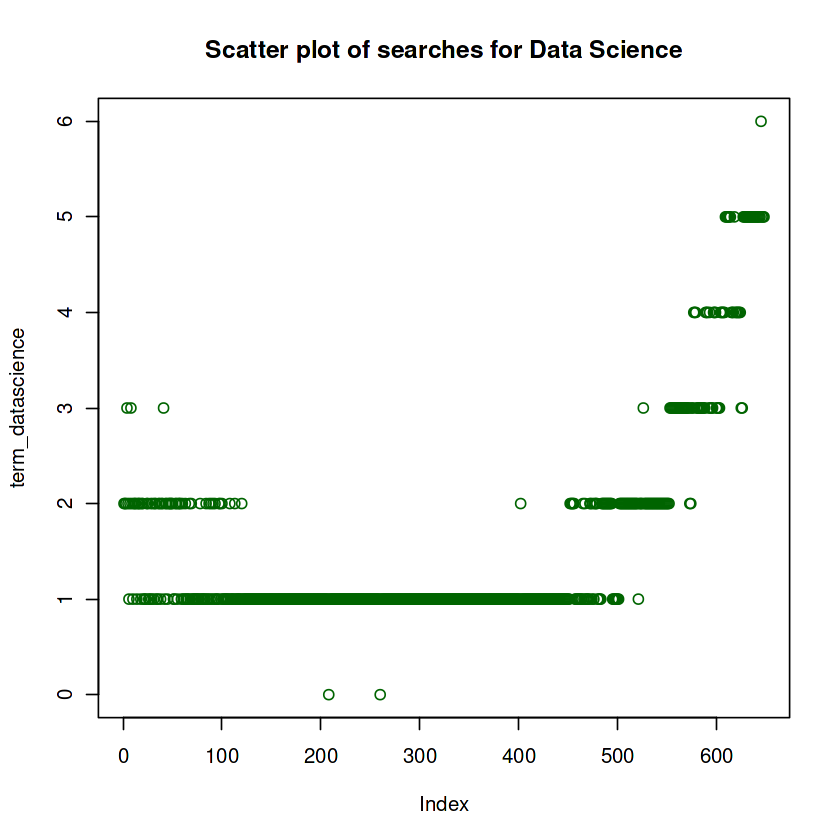

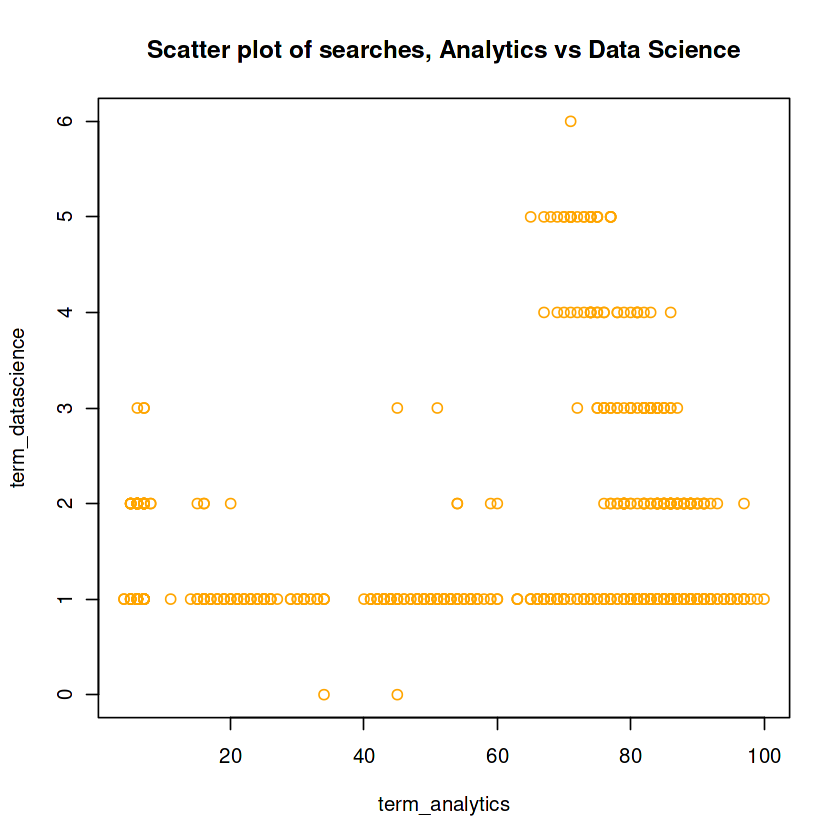

In [68]:
# Let's check the relationship using scatter plots

par(mfrow = c(1,1))
plot(term_analytics,
    main = "Scatter plot of searches for Analytics",
    col = "maroon")
plot(term_datascience,
    main = "Scatter plot of searches for Data Science",
    col = "darkgreen")
plot(term_analytics,term_datascience,
    main = "Scatter plot of searches, Analytics vs Data Science",
    col = "orange")

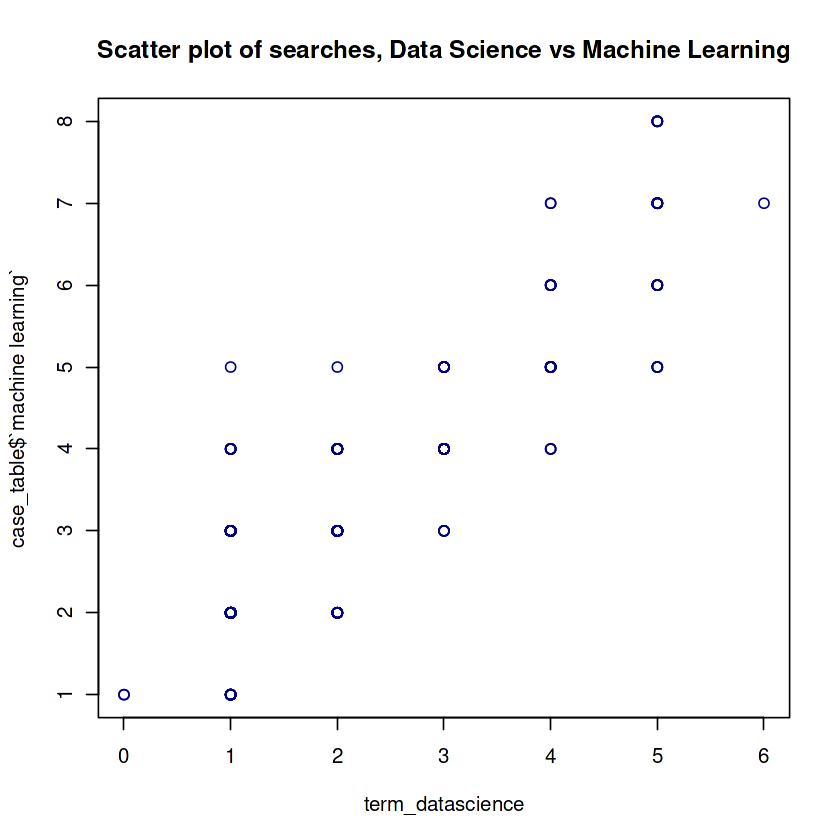

In [69]:
# Data Science and Machine Learning relationship
par(mfrow = c(1,1))
plot(term_datascience, case_table$`machine learning`,
    main = "Scatter plot of searches, Data Science vs Machine Learning",
    col = "darkblue")

* The Scatter plot of searches, Data Science vs Machine Learning plot shows the positive correlation and it is 90%.

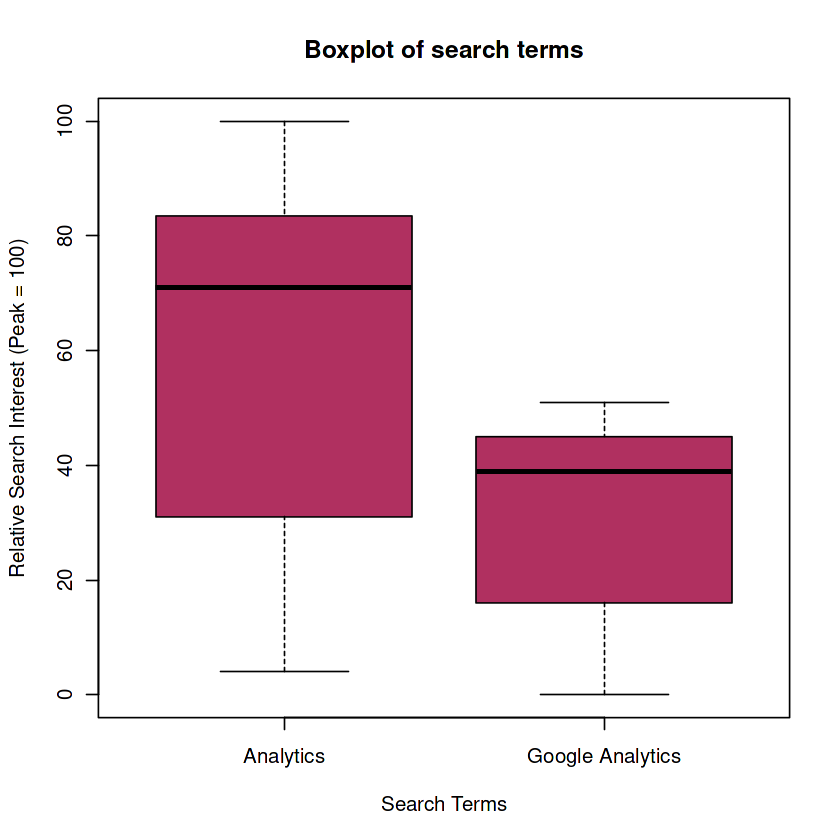

In [70]:
# Let's check about 'analytics' and 'google analytics'

par(mfrow = c(1,1))
boxplot(term_analytics, term_googleanalytics,
       names = c("Analytics","Google Analytics"),
       xlab = "Search Terms",
       ylab = "Relative Search Interest (Peak = 100)",
       main = "Boxplot of search terms",
       col = "maroon"
       )

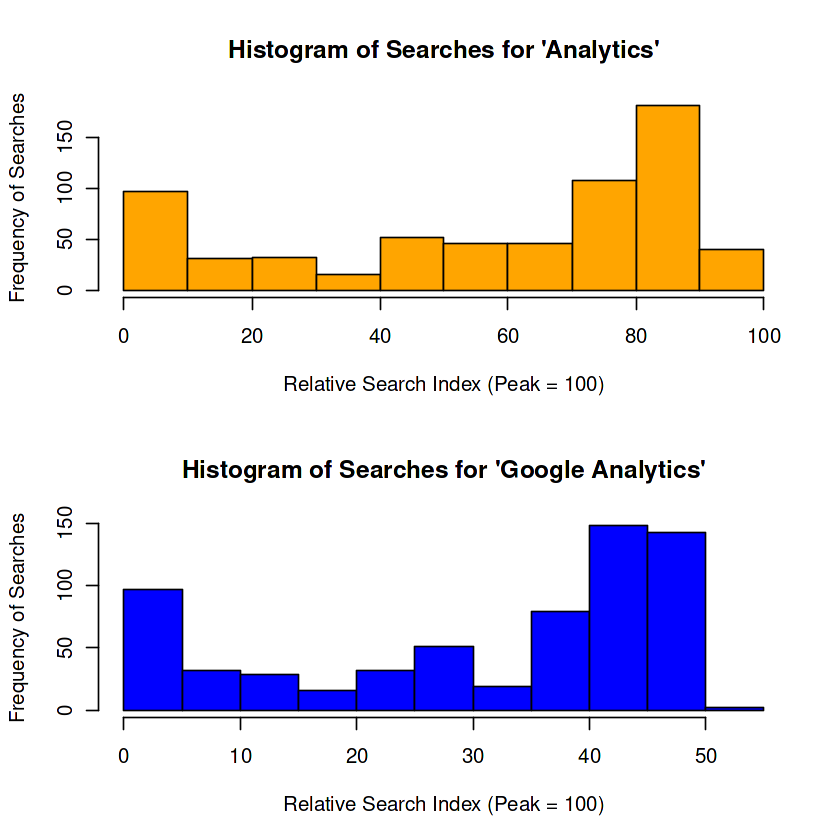

In [71]:
par(mfrow = c(2,1))
hist(term_analytics,
    main = "Histogram of Searches for 'Analytics'",
    ylab = "Frequency of Searches",
    xlab = "Relative Search Index (Peak = 100)",
    col = "orange")
hist(term_googleanalytics,
    main = "Histogram of Searches for 'Google Analytics'",
    ylab = "Frequency of Searches",
    xlab = "Relative Search Index (Peak = 100)",
    col = "blue")

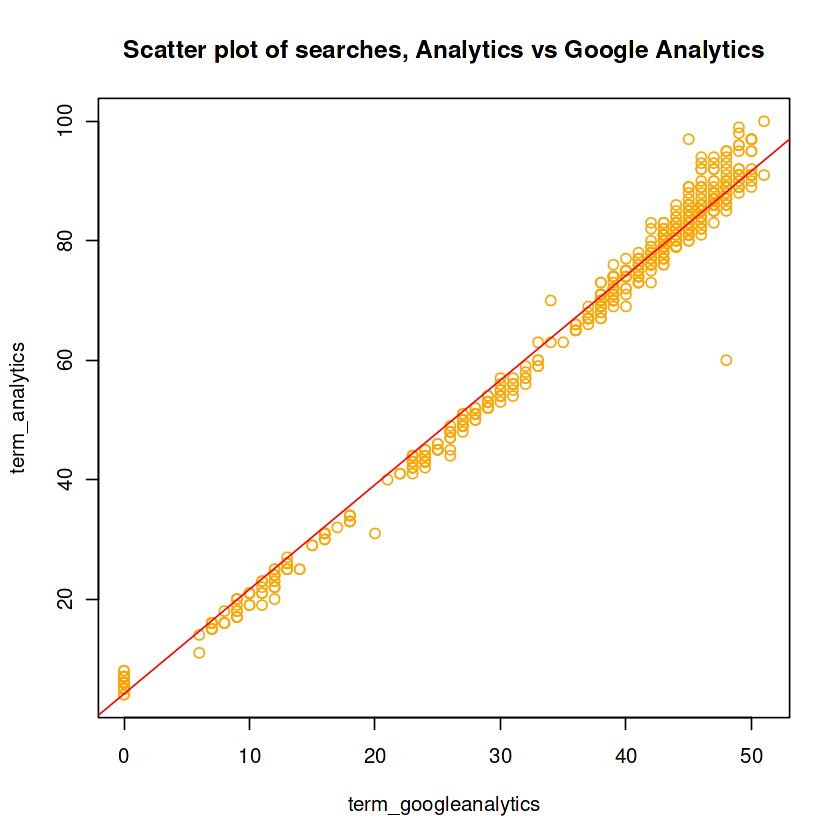

In [79]:
# Analytics and Google Analytics relationship
par(mfrow = c(1,1))
plot(term_googleanalytics, term_analytics,
    main = "Scatter plot of searches, Analytics vs Google Analytics",
    col = "orange")

# Add a best fit line
abline(lm(formula = term_analytics ~ term_googleanalytics),
      main = "Scatter plot of searches Analytics vs Google Analytics",
      col = "red")

### 3. Modeling

In [80]:
# Let's check if variations in the variable 'analytics' can be
# explained by variations in the variable `Google Analytics`

ols_regression <- lm(formula = term_analytics ~ term_googleanalytics)

In [82]:
# Summary of the model
summary(ols_regression)


Call:
lm(formula = term_analytics ~ term_googleanalytics)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.195  -1.893  -0.412   1.805  14.059 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.131529   0.217804   18.97   <2e-16 ***
term_googleanalytics 1.751324   0.006155  284.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.701 on 646 degrees of freedom
Multiple R-squared:  0.9921,	Adjusted R-squared:  0.9921 
F-statistic: 8.097e+04 on 1 and 646 DF,  p-value: < 2.2e-16


In [89]:
names(summary(ols_regression))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [86]:
round(coef(ols_regression), digits = 3)

(Intercept) term_googleanalytics 
               4.132                1.751

In [87]:
round(summary(ols_regression)$r.squared, digits = 3)

[1] 0.992

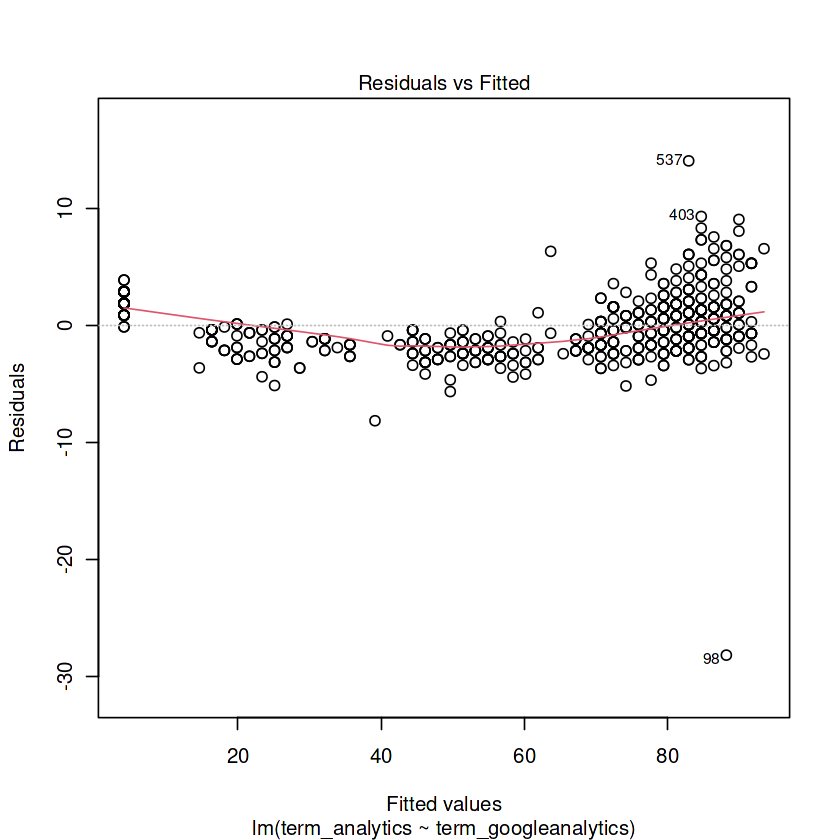

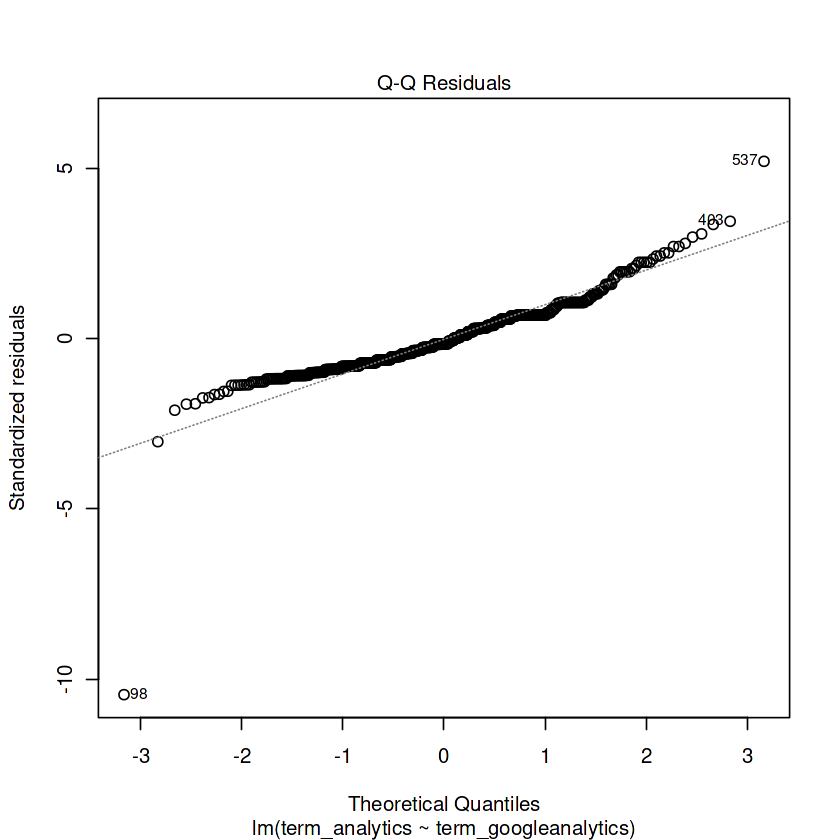

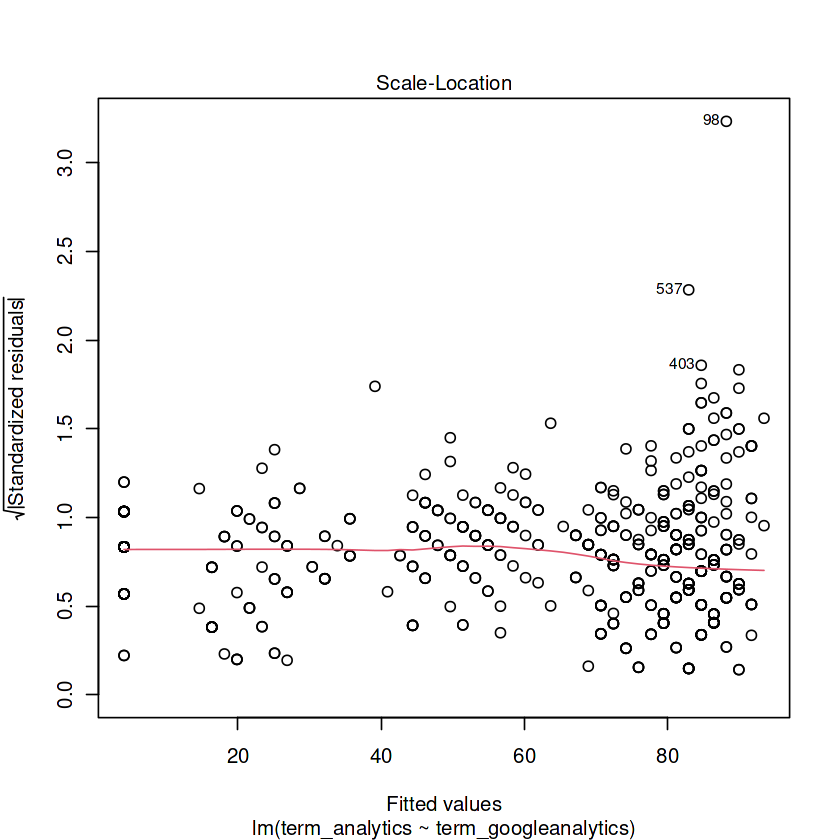

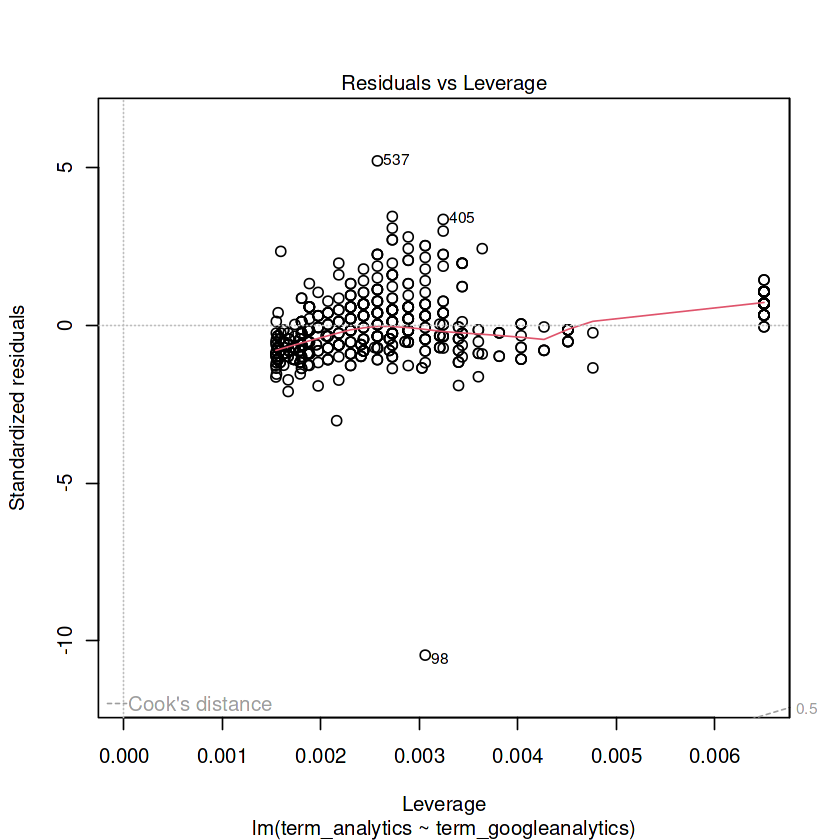

In [88]:
plot(ols_regression)

* The formula is **analytics = 4.312 + 1.751googleanalytics**